In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.regression import *

In [2]:
pd.set_option("display.max_columns", None)
df_train = pd.read_csv("dataset/train.csv")
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [3]:
data = df_train.copy()

In [11]:
ordinal_vars = {'OverallQual': 'ordinal', 'OverallCond': 'ordinal', 'ExterQual': 'ordinal', 'ExterCond': 'ordinal',
                'BsmtQual': 'ordinal', 'BsmtCond': 'ordinal', 'BsmtExposure': 'ordinal', 'BsmtFinType1': 'ordinal',
                'BsmtFinType2': 'ordinal', 'HeatingQC': 'ordinal', 'KitchenQual': 'ordinal', 'FireplaceQu': 'ordinal',
                'GarageQual': 'ordinal', 'GarageCond': 'ordinal'}

nominal_vars = ['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
                'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
                'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical',
                'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType',
                'SaleCondition']

numerical_vars = [i for i in data.columns.tolist() if i not in ordinal_vars and i not in nominal_vars and i not in ["Id", "Utilities", "Street", "PoolQC", "SalePrice"]]

In [5]:
data = data.drop(['Id', 'Utilities', 'Street', 'PoolQC'], axis=1)

In [ ]:
ordinal_vars

# Default Data
## Without Transformation & Scaler

In [16]:
regression_setup = setup(data=data, target='SalePrice', ordinal_features=ordinal_vars, categorical_features=nominal_vars, 
                         numeric_features=numerical_vars)

,Description,Value
0,Session id,5394
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1460, 77)"
4,Transformed data shape,"(1460, 245)"
5,Transformed train set shape,"(1021, 245)"
6,Transformed test set shape,"(439, 245)"
7,Ordinal features,16
8,Numeric features,33
9,Categorical features,29


In [17]:
best_model = compare_models(sort="RMSE")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,18169.1023,1039551029.9212,30640.7915,0.8395,0.1452,0.1060,6.4450
lightgbm,Light Gradient Boosting Machine,18837.3656,1062237332.6544,31623.4979,0.8375,0.1497,0.1087,6.1800
et,Extra Trees Regressor,18788.3297,1144117618.2660,32346.0126,0.8298,0.1537,0.1101,6.9120
ridge,Ridge Regression,20595.9477,1123702617.8633,32500.0965,0.8276,0.1816,0.1241,5.6600
rf,Random Forest Regressor,19373.4701,1116083184.4612,32719.7645,0.8269,0.1591,0.1139,7.1440
en,Elastic Net,21835.0940,1295234410.1767,34901.2154,0.8015,0.1778,0.1286,5.9160
lr,Linear Regression,21833.4042,1316402610.3594,35034.2368,0.7949,0.2225,0.1317,8.2230
lasso,Lasso Regression,21696.5077,1319198342.7380,35046.8539,0.7945,0.2213,0.1305,6.1330
llar,Lasso Least Angle Regression,21449.6047,1321887013.1782,35038.1543,0.7934,0.2000,0.1282,5.8640
omp,Orthogonal Matching Pursuit,23147.0473,1389379425.9132,36235.7409,0.7857,0.1861,0.1366,5.7380


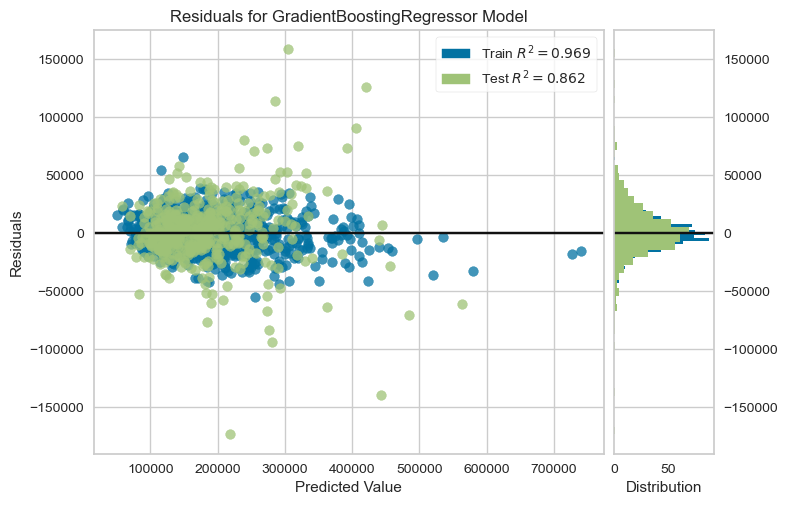

In [19]:
# Plot model performance
plot_model(best_model, plot='residuals')

In [ ]:
# final_model = create_model(tuned_model)

In [ ]:
# predictions = predict_model(final_model, data=df_test)

## With Transformation & Scaler (Robust)

In [20]:
regression_setup = setup(data=data, target='SalePrice', ordinal_features=ordinal_vars, categorical_features=nominal_vars, 
                         numeric_features=numerical_vars, transformation=True, normalize=True, normalize_method="robust")

,Description,Value
0,Session id,220
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1460, 77)"
4,Transformed data shape,"(1460, 241)"
5,Transformed train set shape,"(1021, 241)"
6,Transformed test set shape,"(439, 241)"
7,Ordinal features,16
8,Numeric features,33
9,Categorical features,29


In [21]:
best_model = compare_models(sort="RMSE")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,19172.3430,1059129324.6721,31555.0605,0.8308,0.1548,0.1108,2.2930
lasso,Lasso Regression,23449.0109,1431460050.3651,36289.9783,0.7825,0.2082,0.1399,6.8120
ridge,Ridge Regression,25642.5363,1666848901.4321,39388.6325,0.7457,0.2162,0.1551,6.1140
en,Elastic Net,26127.0319,1779041869.8137,41042.0766,0.7266,0.2320,0.1506,6.3970
knn,K Neighbors Regressor,31731.6320,2718471282.6605,50972.3841,0.5756,0.2555,0.1897,2.2230
llar,Lasso Least Angle Regression,34646.9567,2712353659.4557,51127.6180,0.5729,0.2591,0.2053,6.3040
omp,Orthogonal Matching Pursuit,56833.8730,6177428818.1783,78084.8797,0.0059,0.4007,0.3554,6.2730
lr,Linear Regression,57391.4898,6278054556.0861,78676.4656,-0.0083,0.4079,0.3609,7.9150
dummy,Dummy Regressor,57444.5949,6299814908.6864,78827.4795,-0.0125,0.4062,0.3616,2.2500
par,Passive Aggressive Regressor,74805.3489,10110385508.1195,98551.0959,-0.6801,0.7345,0.4778,5.5420


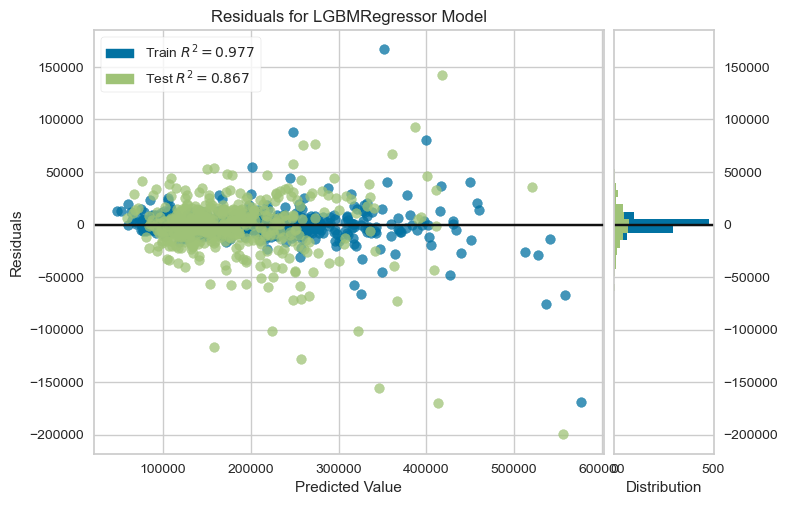

In [22]:
# Plot model performance
plot_model(best_model, plot='residuals')

## With Transformation & Scaler (Z-score)

In [23]:
regression_setup = setup(data=data, target='SalePrice', ordinal_features=ordinal_vars, categorical_features=nominal_vars, 
                         numeric_features=numerical_vars, transformation=True, normalize=True)

,Description,Value
0,Session id,5250
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1460, 77)"
4,Transformed data shape,"(1460, 239)"
5,Transformed train set shape,"(1021, 239)"
6,Transformed test set shape,"(439, 239)"
7,Ordinal features,16
8,Numeric features,33
9,Categorical features,29


In [24]:
best_model = compare_models(sort="RMSE")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,18394.7569,842647655.6214,28690.3452,0.8672,0.1509,0.1093,2.4800
et,Extra Trees Regressor,18887.4942,968075642.0919,30463.3850,0.8494,0.1563,0.1120,2.6360
lightgbm,Light Gradient Boosting Machine,19372.6645,992324774.2898,31005.3904,0.8440,0.1576,0.1140,2.4180
rf,Random Forest Regressor,19602.7258,1025697653.0358,31396.4802,0.8392,0.1637,0.1174,2.7320
en,Elastic Net,21633.9162,1420969360.8020,36417.5301,0.7829,0.1764,0.1226,2.3130
ada,AdaBoost Regressor,25830.2107,1368633210.3452,36667.1117,0.7847,0.2110,0.1687,2.4380
br,Bayesian Ridge,22421.4486,1470027454.4721,36987.3432,0.7713,0.2020,0.1323,2.3630
par,Passive Aggressive Regressor,20732.3844,1452216553.8378,36988.6605,0.7789,0.1808,0.1164,2.3530
omp,Orthogonal Matching Pursuit,22623.6502,1464681279.9676,37316.1795,0.7703,0.1917,0.1343,2.3900
llar,Lasso Least Angle Regression,22171.9157,1487416489.6090,37402.6823,0.7695,0.1861,0.1293,2.4130


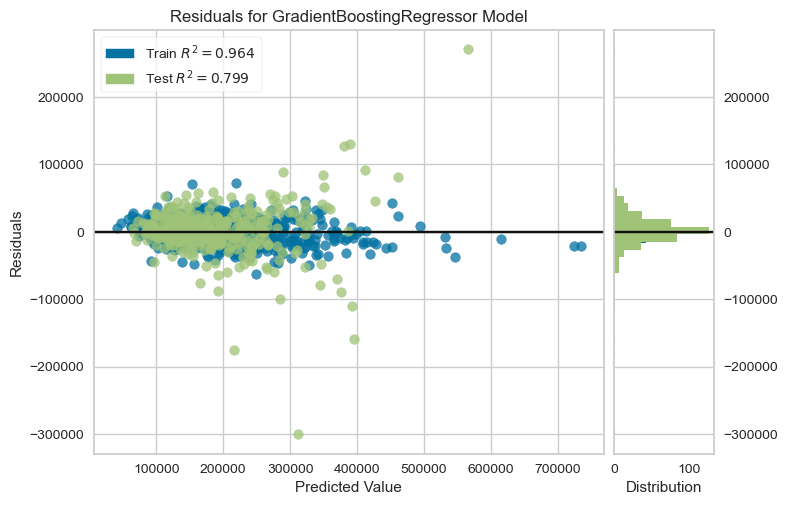

In [25]:
# Plot model performance
plot_model(best_model, plot='residuals')

## With Transformation & Scaler (Z-Score) & Dim Reduction

In [17]:
regression_setup = setup(data=data, target='SalePrice', ordinal_features=ordinal_vars, categorical_features=nominal_vars, 
                         numeric_features=numerical_vars, transformation=True, normalize=True, pca=True, pca_method="incremental", remove_outliers=True)

,Description,Value
0,Session id,5011
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1460, 77)"
4,Transformed data shape,"(1409, 243)"
5,Transformed train set shape,"(970, 243)"
6,Transformed test set shape,"(439, 243)"
7,Ordinal features,16
8,Numeric features,33
9,Categorical features,29


In [18]:
best_model = compare_models(sort="RMSE")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
en,Elastic Net,21381.8235,1319405999.2148,35054.0457,0.7897,0.1752,0.1259,2.3430
et,Extra Trees Regressor,21447.0576,1384104797.2122,35986.5786,0.7763,0.1727,0.1265,2.8980
br,Bayesian Ridge,22360.3341,1408611099.5209,36023.6245,0.7738,0.2393,0.1362,2.3220
par,Passive Aggressive Regressor,21804.6558,1371693607.6146,36026.1721,0.7809,0.2182,0.1289,2.3980
gbr,Gradient Boosting Regressor,21681.8638,1443131396.4499,36754.3484,0.7633,0.1759,0.1290,3.4590
huber,Huber Regressor,22403.9365,1443976185.2764,36803.9030,0.7701,0.2184,0.1358,2.3880
lightgbm,Light Gradient Boosting Machine,22680.4695,1416801073.5247,36855.0355,0.7679,0.1841,0.1376,2.7440
rf,Random Forest Regressor,22403.8971,1448331826.2586,37058.0615,0.7651,0.1787,0.1311,4.6520
omp,Orthogonal Matching Pursuit,24037.7780,1473690239.8782,37342.2361,0.7651,0.1986,0.1456,2.2900
ridge,Ridge Regression,24032.2499,1627239232.5846,38612.3166,0.7387,0.2758,0.1499,2.3380


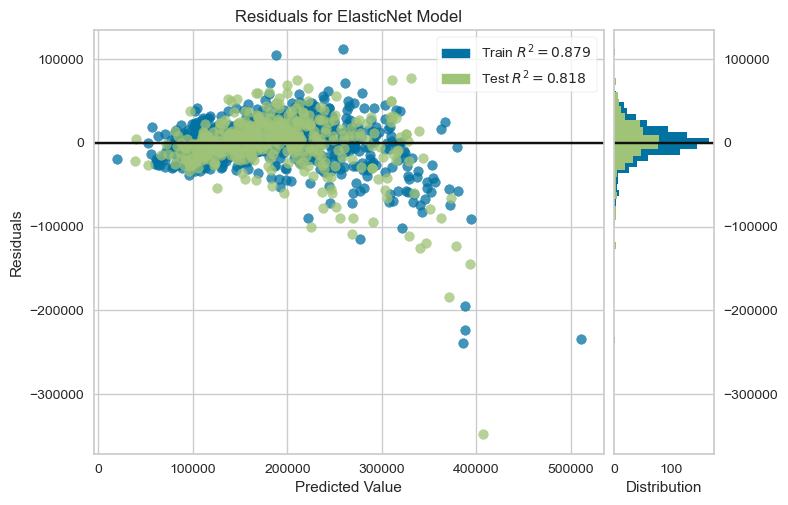

In [19]:
# Plot model performance
plot_model(best_model, plot='residuals')

## With Transformation & Scaler & Feature Selection

In [20]:
regression_setup = setup(data=data, target='SalePrice', ordinal_features=ordinal_vars, categorical_features=nominal_vars, 
                         numeric_features=numerical_vars, transformation=True, normalize=True, feature_selection=True)

,Description,Value
0,Session id,6164
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1460, 77)"
4,Transformed data shape,"(1460, 16)"
5,Transformed train set shape,"(1021, 16)"
6,Transformed test set shape,"(439, 16)"
7,Ordinal features,16
8,Numeric features,33
9,Categorical features,29


In [21]:
best_model = compare_models(sort="RMSE")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,19781.4247,1024742375.0951,31501.1730,0.8267,0.1600,0.1173,2.2540
gbr,Gradient Boosting Regressor,20231.8853,1022235072.4022,31532.7059,0.8215,0.1616,0.1197,2.2320
rf,Random Forest Regressor,20271.3022,1124242856.9705,33004.7255,0.8038,0.1631,0.1195,2.3390
lightgbm,Light Gradient Boosting Machine,20710.0672,1250009171.6094,34753.7634,0.7820,0.1666,0.1208,2.1370
ada,AdaBoost Regressor,26485.6781,1487144659.3789,38329.7179,0.7459,0.2173,0.1759,2.1540
knn,K Neighbors Regressor,24362.7930,1687621227.5082,40425.5085,0.7043,0.1892,0.1416,2.0800
dt,Decision Tree Regressor,28700.9214,1914883097.0081,43533.6620,0.6684,0.2305,0.1681,2.0790
huber,Huber Regressor,25199.2340,1978307154.5046,43701.6776,0.6756,0.2154,0.1407,1.9700
br,Bayesian Ridge,26948.3273,2019763424.9795,43976.3676,0.6528,0.2550,0.1596,1.9550
par,Passive Aggressive Regressor,25175.2165,2008144920.5449,44022.4000,0.6733,0.2111,0.1391,1.9710


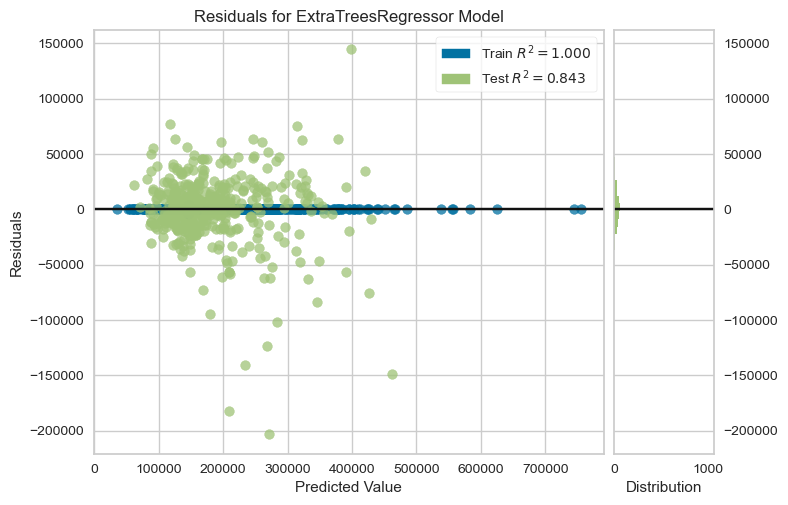

In [22]:
# Plot model performance
plot_model(best_model, plot='residuals')

## With Only Transformation

In [25]:
regression_setup = setup(data=data, target='SalePrice', ordinal_features=ordinal_vars, categorical_features=nominal_vars, 
                         numeric_features=numerical_vars, transformation=True)

,Description,Value
0,Session id,5405
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1460, 77)"
4,Transformed data shape,"(1460, 242)"
5,Transformed train set shape,"(1021, 242)"
6,Transformed test set shape,"(439, 242)"
7,Ordinal features,16
8,Numeric features,33
9,Categorical features,29


In [26]:
best_model = compare_models(sort="RMSE")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,19260.0155,1102299282.9718,32306.1292,0.8227,0.1571,0.1117,2.2110
lasso,Lasso Regression,22883.9255,1637382744.7347,37884.1437,0.7344,0.2185,0.1394,2.1050
ridge,Ridge Regression,25104.1712,1809480495.5964,40241.5864,0.7111,0.2281,0.1544,2.0190
en,Elastic Net,26890.0417,2107308248.1219,43794.9421,0.6624,0.2435,0.1609,2.0500
lar,Least Angle Regression,44580.4656,4306553982.8007,64311.3682,0.3393,0.3216,0.2654,2.1470
llar,Lasso Least Angle Regression,45498.4883,4444189629.3550,64819.0751,0.3316,0.3261,0.2711,2.1850
omp,Orthogonal Matching Pursuit,52032.6693,5425862513.5826,72750.0708,0.1428,0.3738,0.3263,2.1710
dummy,Dummy Regressor,58224.5431,6434673178.2518,79414.3031,-0.0141,0.4146,0.3730,2.1470
lr,Linear Regression,58413.8290,6456635072.9370,79551.8236,-0.0176,0.4168,0.3746,2.9710
br,Bayesian Ridge,58631.5904,6506507330.1452,79853.1477,-0.0253,0.4167,0.3765,2.1630


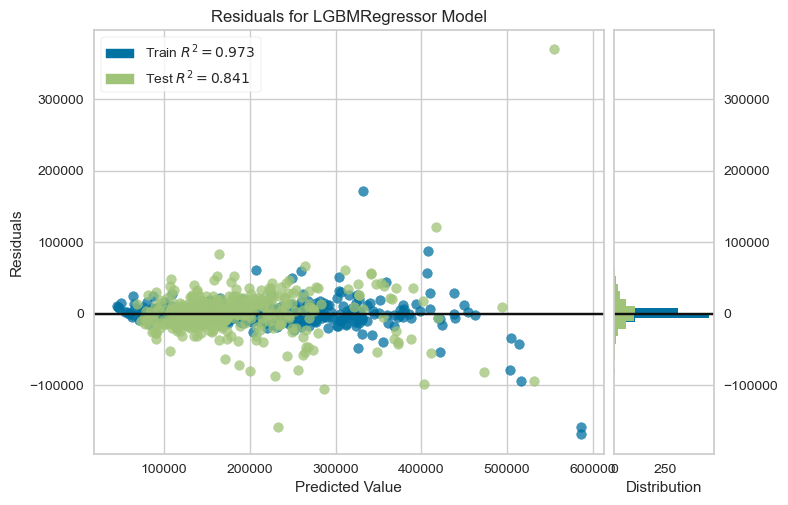

In [27]:
# Plot model performance
plot_model(best_model, plot='residuals')